In [1]:
import pandas as pd                # Import library pandas untuk membaca file Excel
import numpy as np                 # Import library numpy untuk operasi matematika
import matplotlib.pyplot as plt    # Import matplotlib untuk membuat grafik

In [3]:
data = pd.read_excel('data.xlsx')                    # Baca data dari file Excel
x = np.arange(1, 145)                                # Buat array x dari 1 sampai 144 (bulan)
y = data.iloc[0].values.astype(float)               # Ambil baris pertama dari data sebagai array y

PROBLEM 1
Parameter model kuadratik: a = 0.706, b = -1.680, c = 2349.630
Bulan 1 (x = 1):
  Model Kuadratik: 0.706 * 1^2 + -1.680 * 1 + 2349.630 = 2348.655
Bulan 2 (x = 2):
  Model Kuadratik: 0.706 * 2^2 + -1.680 * 2 + 2349.630 = 2349.092
Bulan 3 (x = 3):
  Model Kuadratik: 0.706 * 3^2 + -1.680 * 3 + 2349.630 = 2350.941
Bulan 4 (x = 4):
  Model Kuadratik: 0.706 * 4^2 + -1.680 * 4 + 2349.630 = 2354.202
Bulan 5 (x = 5):
  Model Kuadratik: 0.706 * 5^2 + -1.680 * 5 + 2349.630 = 2358.875
Bulan 6 (x = 6):
  Model Kuadratik: 0.706 * 6^2 + -1.680 * 6 + 2349.630 = 2364.960
Bulan 7 (x = 7):
  Model Kuadratik: 0.706 * 7^2 + -1.680 * 7 + 2349.630 = 2372.456
Bulan 8 (x = 8):
  Model Kuadratik: 0.706 * 8^2 + -1.680 * 8 + 2349.630 = 2381.364
Bulan 9 (x = 9):
  Model Kuadratik: 0.706 * 9^2 + -1.680 * 9 + 2349.630 = 2391.684
Bulan 10 (x = 10):
  Model Kuadratik: 0.706 * 10^2 + -1.680 * 10 + 2349.630 = 2403.416
Bulan 11 (x = 11):
  Model Kuadratik: 0.706 * 11^2 + -1.680 * 11 + 2349.630 = 2416.559
Bulan 

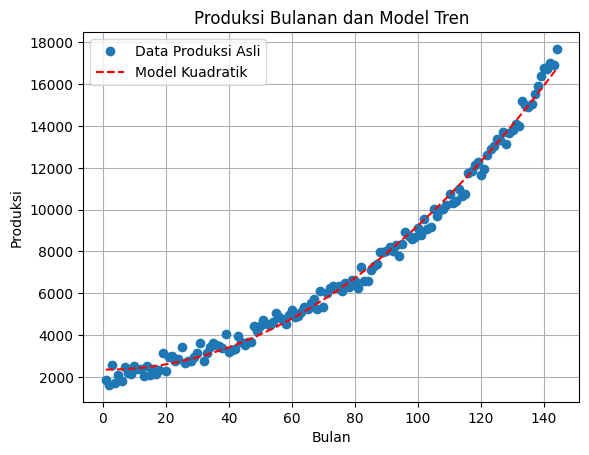

In [6]:
print("PROBLEM 1")

# Menyiapkan matrix desain untuk regresi kuadratik: kolom pertama x^2, kedua x, ketiga semua 1 (intercept)
X = np.vstack([x**2, x, np.ones_like(x)]).T  

# Hitung koefisien model kuadratik dengan metode least squares (lebih stabil daripada invers matrix manual)
koefisien = np.linalg.lstsq(X, y, rcond=None)[0]  

# Ambil koefisien a, b, c dari hasil regresi
a, b, c = koefisien  

# Hitung prediksi produksi berdasarkan model kuadratik yang terbentuk
hasil_prediksi = a * x**2 + b * x + c  

# Cetak parameter model dengan format 3 angka di belakang koma
print(f"Parameter model kuadratik: a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")

# Loop untuk mencetak nilai prediksi tiap bulan dengan jelas
for i, xi in enumerate(x, start=1):
    nilai_kuadratik = a * xi**2 + b * xi + c
    print(f"Bulan {i} (x = {xi}):")
    print(f"  Model Kuadratik: {a:.3f} * {xi}^2 + {b:.3f} * {xi} + {c:.3f} = {nilai_kuadratik:.3f}")

# Plot data asli (bulatan) dan hasil model kuadratik (garis putus-putus merah)
plt.plot(x, y, 'o', label='Data Produksi Asli')
plt.plot(x, hasil_prediksi, 'r--', label='Model Kuadratik')

# Label sumbu dan judul plot biar mudah dipahami
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Produksi Bulanan dan Model Tren')

# Tambahkan legenda dan grid agar plot lebih informatif dan rapi
plt.legend()
plt.grid(True)

# Tampilkan plot ke layar
plt.show()

In [8]:
print("PROBLEM 2")

# Tentukan titik tengah (mean dari x) sebagai pusat ekspansi deret Taylor
titik_tengah = x.mean()  

# Hitung nilai fungsi kuadratik di titik tengah (nilai f(titik_tengah))
nilai_tengah = a * titik_tengah**2 + b * titik_tengah + c  

# Hitung turunan pertama fungsi kuadratik di titik tengah
turunan_pertama = 2 * a * titik_tengah + b  

# Hitung turunan kedua fungsi kuadratik (konstan, karena fungsi kuadrat)
turunan_kedua = 2 * a  

# Cetak rumus deret Taylor orde 2 di sekitar titik tengah dengan format rapi
print(f"Deret Taylor: f(x) = {nilai_tengah:.3f} + {turunan_pertama:.3f}(x - {titik_tengah:.3f}) + 0.5*{turunan_kedua:.4f}(x - {titik_tengah:.3f})^2")

# Uji prediksi nilai fungsi di bulan pertama (x=1) menggunakan deret Taylor
bulan_uji = 1  
nilai_prediksi = nilai_tengah + turunan_pertama * (bulan_uji - titik_tengah) + 0.5 * turunan_kedua * (bulan_uji - titik_tengah)**2  

# Cetak langkah perhitungan prediksi di bulan pertama secara rinci
print(f"Nilai prediksi pada bulan pertama: \n{nilai_tengah:.3f} + {turunan_pertama:.3f} * (1 - {titik_tengah:.3f}) + 0.5 * {turunan_kedua:.4f} * (1 - {titik_tengah:.3f})^2 = {nilai_prediksi:.3f}")

# Ambil nilai asli produksi di bulan pertama dari data y
nilai_aktual = y[bulan_uji - 1]  

# Hitung akurasi prediksi deret Taylor dengan rumus selisih relatif (%)
akurasi = 100 - np.abs(nilai_prediksi - nilai_aktual) / nilai_aktual * 100  

# Tampilkan persentase akurasi prediksi model deret Taylor di bulan pertama
print(f"Akurasi deret Taylor (pada bulan pertama): {akurasi:.3f}%")


PROBLEM 2
Deret Taylor: f(x) = 5938.208 + 100.676(x - 72.500) + 0.5*1.4118(x - 72.500)^2
Nilai prediksi pada bulan pertama: 
5938.208 + 100.676 * (1 - 72.500) + 0.5 * 1.4118 * (1 - 72.500)^2 = 2348.655
Akurasi deret Taylor (pada bulan pertama): 73.932%


In [7]:
print("PROBLEM 3")

# Fungsi prediksi produksi dikurangi kapasitas gudang (25000 tas)
def fungsi_prediksi(x):
    return a * x**2 + b * x + (c - 25000)  # Fungsi kuadrat, minus kapasitas 25000

# Fungsi turunan dari fungsi prediksi, dipakai buat metode Newton-Raphson
def fungsi_turunan(x):
    return 2 * a * x + b  # Turunan fungsi kuadrat

# Metode Newton-Raphson: cari akar fungsi (nilai x yang bikin fungsi_prediksi=0)
def metode_newton(tebakan_awal, toleransi=0.001, iterasi_maksimal=1000):
    for i in range(iterasi_maksimal):  # Loop sampai iterasi maksimal
        tebakan_baru = tebakan_awal - fungsi_prediksi(tebakan_awal) / fungsi_turunan(tebakan_awal)  # Rumus Newton

        print(f'Iterasi {i+1}: {tebakan_baru:.3f}')  # Tampilkan progres tiap iterasi
        
        # Cek apakah fungsi sudah cukup dekat dengan nol (akar sudah ketemu)
        if np.abs(fungsi_prediksi(tebakan_baru)) < toleransi:
            print(f"Produksi melebihi 25000 tas pada bulan: {tebakan_baru:.3f}")  # Info kapan kapasitas terlewati
            return tebakan_baru  # Keluarkan nilai akar
        
        tebakan_awal = tebakan_baru  # Update tebakan untuk iterasi selanjutnya

    return None  # Jika tidak konvergen dalam iterasi maksimal

# Mulai cari bulan kapan produksi melewati kapasitas 25000
nilai_awal = 100  # Tebakan awal bulan ke-100 (perkiraan awal)
bulan_melebihi_kapasitas = metode_newton(nilai_awal)  # Panggil fungsi Newton-Raphson

# Asumsi perlu 13 bulan sebelum kapasitas penuh untuk mulai bangun gudang baru
bulan_mulai_pembangunan = bulan_melebihi_kapasitas - 13  
print(f"Mulai membangun gudang baru pada bulan: {bulan_mulai_pembangunan:.3f}")


PROBLEM 3
Iterasi 1: 212.970
Iterasi 2: 182.839
Iterasi 3: 180.340
Iterasi 4: 180.323
Produksi melebihi 25000 tas pada bulan: 180.323
Mulai membangun gudang baru pada bulan: 167.323
